In [ ]:
from sympy import *
init_printing()

## Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Cleaned data etc./data_cleaned_and_interpolated.csv'

# Adjust these column names as needed.
date_col = 'time'
target_col = 'KarupBro'
# List of meteorological features from DMI – update if needed.
input_cols = [
    'temp_min_daily', 'temp_max_daily', 'temp_mean_daily', 
    'temp_grass_mean_daily', 'temp_soil_min_daily', 'temp_soil_max_daily', 
    'temp_soil_mean_daily', 'humidity_daily', 'wind_direction_daily', 
    'wind_speed_daily', 'wind_gust_max_daily', 'precip_total_daily', 
    'precip_duration_daily', 'radiation_global_daily', 
    'sunshine_duration_daily'
]


# Read the CSV
df = pd.read_csv(DATA_PATH, parse_dates=[date_col])
df.sort_values(date_col, inplace=True)
df.reset_index(drop=True, inplace=True)

# Optional: Set the date column as index (if needed)
df.set_index(date_col, inplace=True)

df.tail()

,temp_min_daily,temp_max_daily,temp_mean_daily,temp_grass_mean_daily,temp_soil_min_daily,temp_soil_max_daily,temp_soil_mean_daily,humidity_daily,wind_direction_daily,wind_gust_max_daily,wind_speed_daily,precip_total_daily,precip_duration_daily,radiation_global_daily,sunshine_duration_daily,KarupBro,ET0
time,,,,,,,,,,,,,,,,,
2023-12-20,0.8,4.4,3.141667,2.316667,5.1,5.4,5.241667,88.583333,252.000000,12.2,2.541667,0.4,4.0,349.0,111.0,4448.18,36.289050
2023-12-21,1.4,8.7,5.316667,4.637500,5.0,5.3,5.141667,86.083333,254.666667,22.5,5.329167,19.9,159.0,270.0,29.5,5602.14,24.390254
2023-12-22,0.1,4.0,2.395833,1.129167,4.0,5.1,4.533333,66.000000,293.416667,19.1,5.020833,0.6,3.0,749.0,294.5,6636.60,60.468354
2023-12-23,-1.6,3.3,0.833333,-0.250000,3.6,4.1,3.754167,88.000000,264.000000,10.5,2.379167,0.8,4.0,589.0,247.0,5809.15,56.266438
2023-12-24,-0.3,2.1,1.120000,0.700000,3.4,3.6,3.520000,97.700000,136.500000,6.6,1.500000,5.0,38.0,9.0,0.0,5197.78,0.986866


In [2]:
# Replace outliers with NaN
df.loc[df["temp_mean_daily"] > 35, "temp_mean_daily"] = np.nan

# Forward-fill (ffill) the missing values
df["temp_mean_daily"] = df["temp_mean_daily"].ffill()

# Replace outliers with NaN
df.loc[df["precip_total_daily"] > 100, "precip_total_daily"] = np.nan

# Forward-fill (ffill) the missing values
df["precip_total_daily"] = df["precip_total_daily"].ffill()

## Basic datafordeling

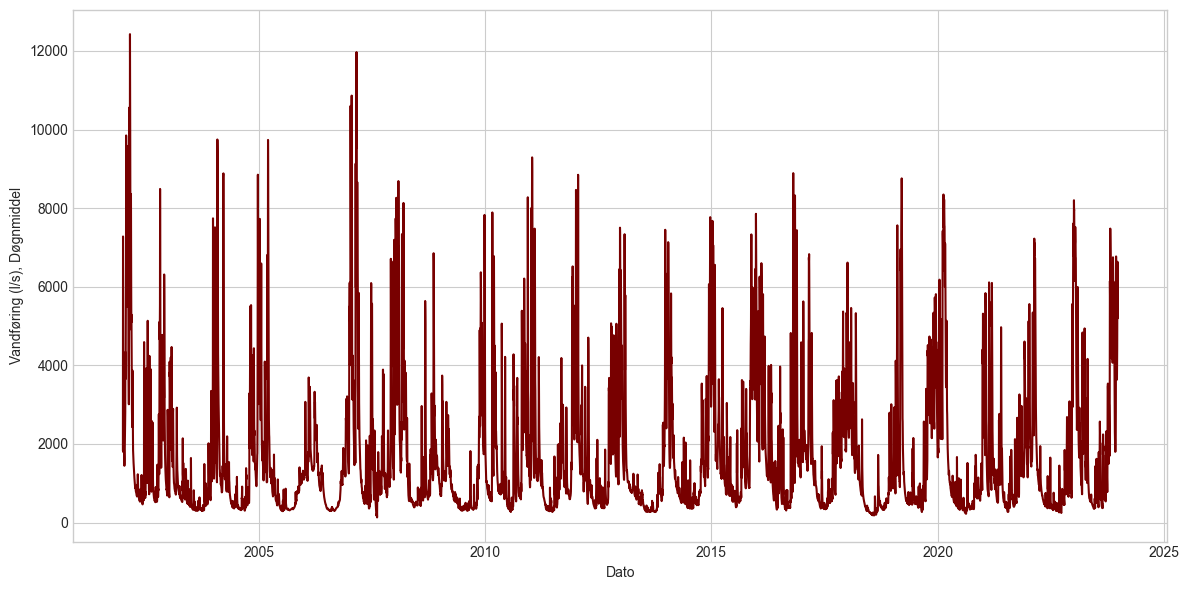

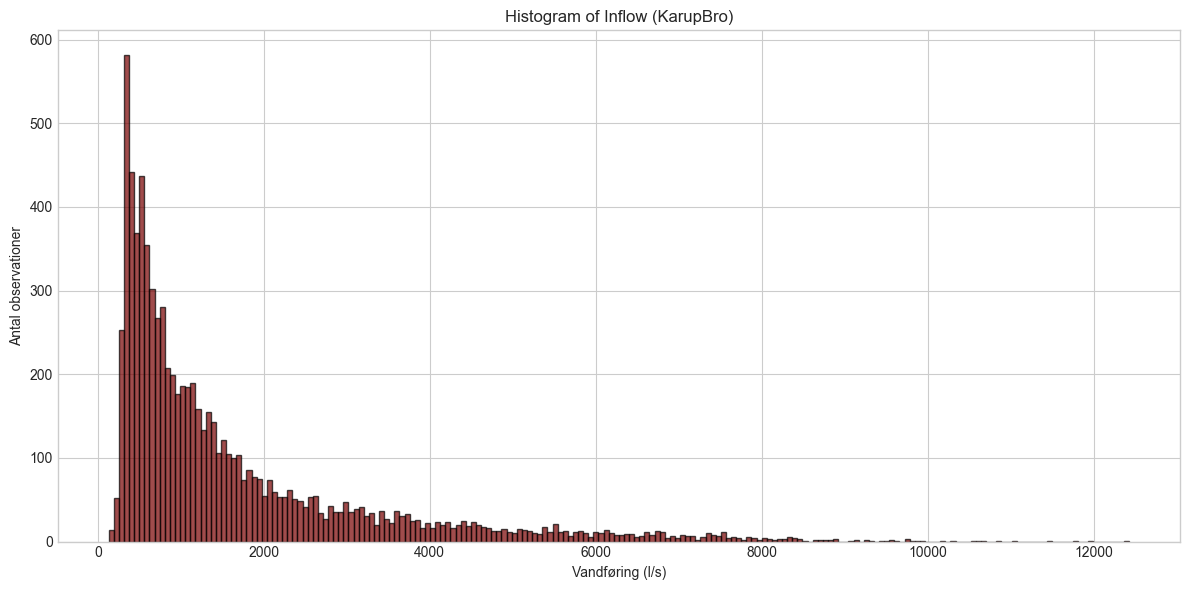

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Stiltema (til hele rapporten)
plt.style.use('seaborn-v0_8-whitegrid')

# Tailwind-inspired palette (named)
colors = {
    "barn_red": "#780000",               # primary for inflow
    "fire_brick": "#c1121f",             # alternative red
    "papaya_whip": "#fdf0d5",            # background / highlight
    "prussian_blue": "#003049",          # dark blue
    "air_superiority_blue": "#669bbc"    # for precipitation
}

# Create a plot with the updated palette
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['KarupBro'], color=colors["barn_red"], linewidth=1.5)
ax.set_ylabel("Vandføring (l/s), Døgnmiddel")
ax.set_xlabel("Dato")
ax.tick_params(axis='y')
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# also plot histogram of inflow
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['KarupBro'].dropna(), bins=200, color=colors["barn_red"], edgecolor='black', alpha=0.7)
ax.set_title("Histogram of Inflow (KarupBro)")
ax.set_xlabel("Vandføring (l/s)")
ax.set_ylabel("Antal observationer")
plt.tight_layout()

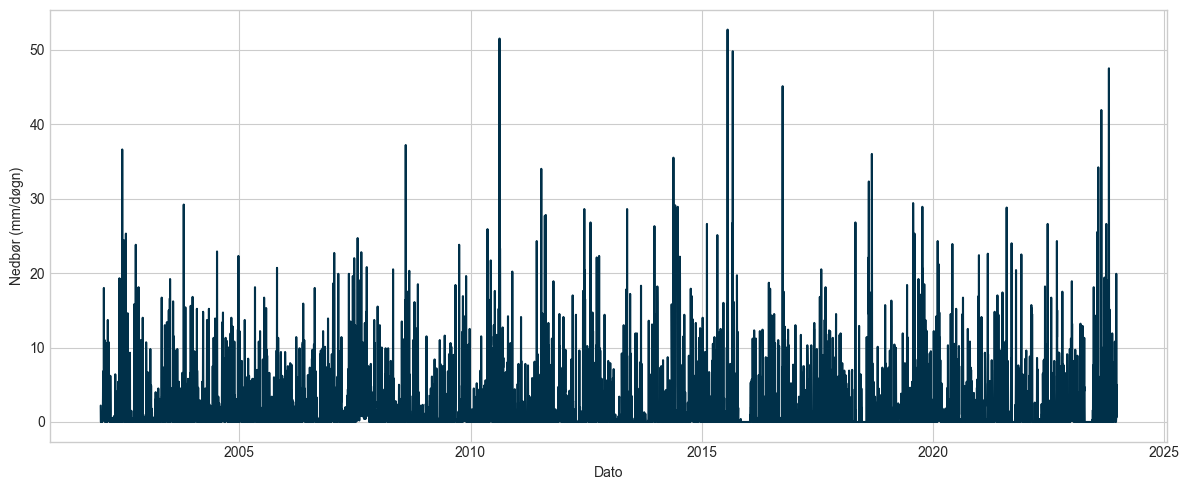

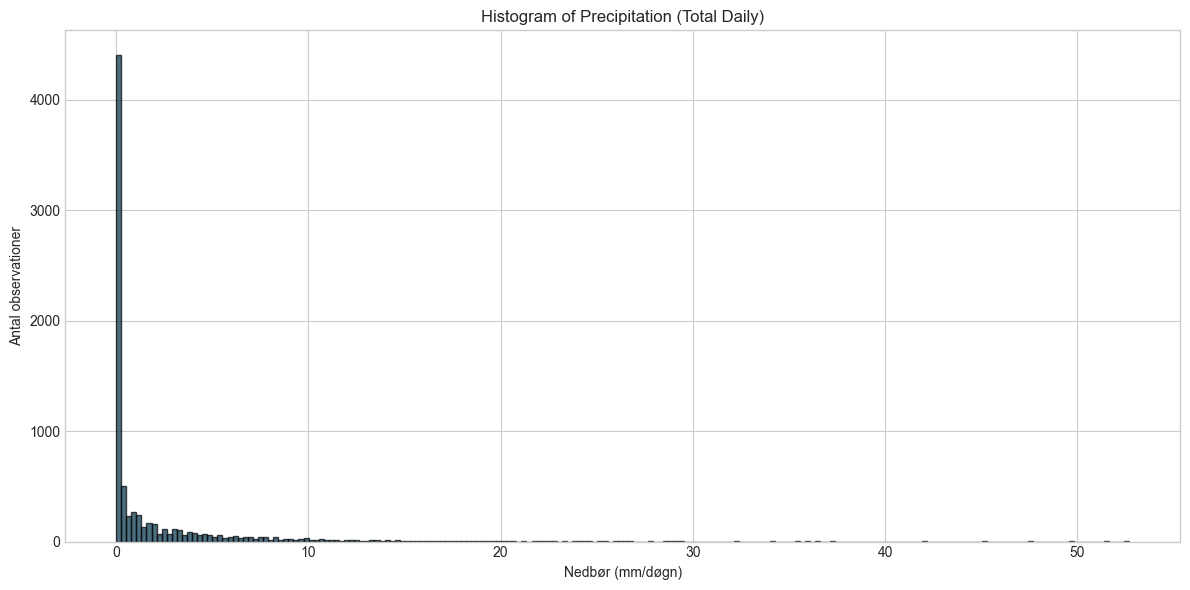

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Stiltema (til hele rapporten)
plt.style.use('seaborn-v0_8-whitegrid')

# Tailwind-inspired palette (named)
colors = {
    "barn_red": "#780000",               # primary for inflow
    "fire_brick": "#c1121f",             # alternative red
    "papaya_whip": "#fdf0d5",            # background / highlight
    "prussian_blue": "#003049",          # dark blue
    "air_superiority_blue": "#669bbc"    # for precipitation
}

# Create a plot with the updated palette
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.index, df['precip_total_daily'], color=colors["prussian_blue"], linewidth=1.5)
ax.set_ylabel("Nedbør (mm/døgn)")
ax.set_xlabel("Dato")
ax.tick_params(axis='y')
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# also plot histogram of precipitation
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['precip_total_daily'].dropna(), bins=200, color=colors["prussian_blue"], edgecolor='black', alpha=0.7)
ax.set_title("Histogram of Precipitation (Total Daily)")
ax.set_xlabel("Nedbør (mm/døgn)")
ax.set_ylabel("Antal observationer")
plt.tight_layout()

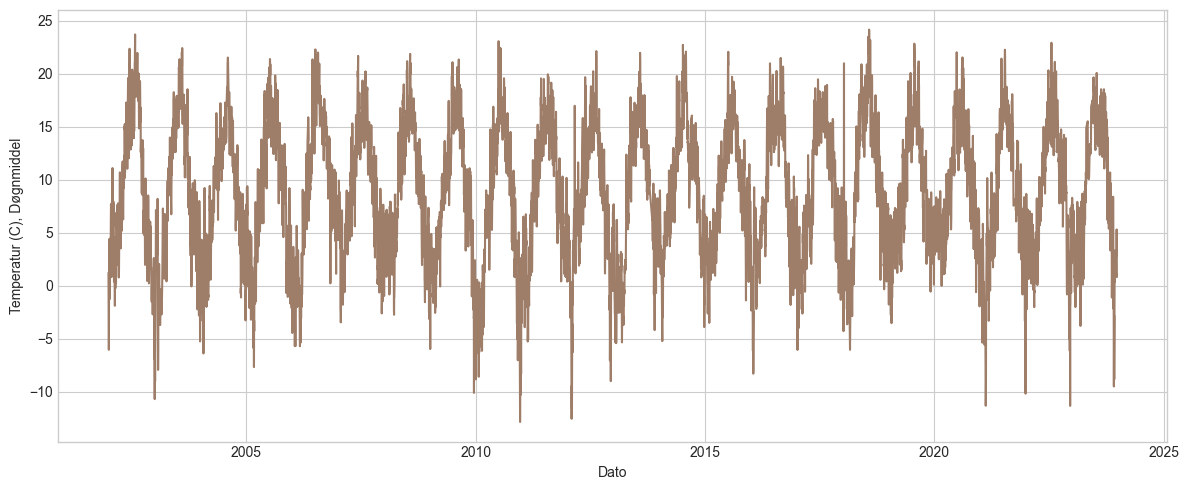

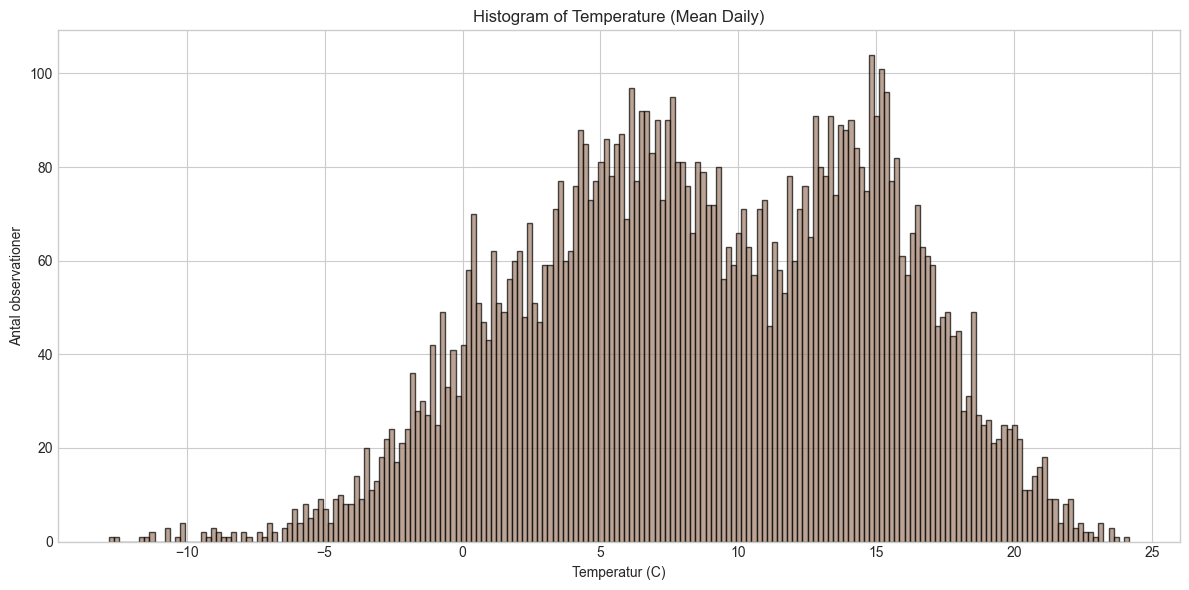

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Stiltema (til hele rapporten)
plt.style.use('seaborn-v0_8-whitegrid')

# Tailwind-inspired palette (named)
colors = {
    "barn_red": "#780000",
    "fire_brick": "#c1121f",
    
    # Nye beige nuancer
    "beaver": "#9F7E69",  # mørkere beige
    "dun": "#D2BBA0",     # lysere beige
    
    "prussian_blue": "#003049",
    "air_superiority_blue": "#669bbc",
    
    # Grøn og tilsvarende lysere nuance
    "fern_green": "#4F7942",       # original grøn
    "light_fern_green": "#84A17B", # lysere
    
    # Lilla og tilsvarende lysere nuance
    "muted_purple": "#6A4C93",       # original lilla
    "light_muted_purple": "#9782B3"  # lysere
}

# Create a plot with the updated palette
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.index, df['temp_mean_daily'], color=colors["beaver"], linewidth=1.5)
ax.set_ylabel("Temperatur (C), Døgnmiddel")
ax.set_xlabel("Dato")
ax.tick_params(axis='y')
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# also plot histogram of temperature
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['temp_mean_daily'].dropna(), bins=200, color=colors["beaver"], edgecolor='black', alpha=0.7)
ax.set_title("Histogram of Temperature (Mean Daily)")
ax.set_xlabel("Temperatur (C)")
ax.set_ylabel("Antal observationer")
plt.tight_layout()

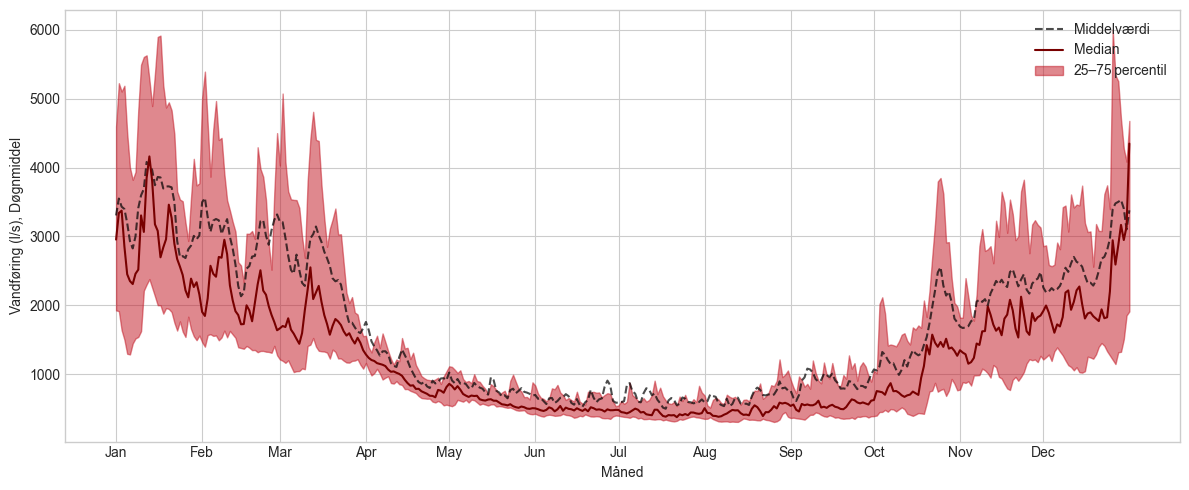

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Antag, at df er din DataFrame med et datetime-indeks og kolonnen 'KarupBro'
df['DayOfYear'] = df.index.dayofyear

# Grupper dataene efter 'DayOfYear' og beregn mean, median samt 25% og 75% percentil for 'KarupBro'
daily_stats = df.groupby('DayOfYear')['KarupBro'].agg(
    mean='mean',
    median='median',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
)

# Find dag-på-året for månedernes første dag (brug et ikke-skudår som reference)
month_starts = pd.date_range('2001-01-01', periods=12, freq='MS')
month_days   = month_starts.dayofyear
month_names  = month_starts.strftime('%b')  # 'Jan', 'Feb', ...

# Brug din Tailwind-inspirerede palette
colors = {
    "barn_red": "#780000",               
    "fire_brick": "#c1121f",             
    "papaya_whip": "#fdf0d5",            
    "prussian_blue": "#003049",          
    "air_superiority_blue": "#669bbc"    
}

# Opret plottet
fig, ax = plt.subplots(figsize=(12, 5))

# Plot mean
ax.plot(
    daily_stats.index,
    daily_stats['mean'],
    color="black",
    alpha=0.7,
    linewidth=1.5,
    linestyle='--',
    label='Middelværdi'
)

# Plot median
ax.plot(
    daily_stats.index,
    daily_stats['median'],
    color=colors["barn_red"],
    linewidth=1.5,
    label='Median'
)

# Fyld mellem 25% og 75% percentil
ax.fill_between(
    daily_stats.index,
    daily_stats['q25'],
    daily_stats['q75'],
    color=colors["fire_brick"],
    alpha=0.5,
    label='25–75 percentil'
)

# Sæt labels
ax.set_ylabel("Vandføring (l/s), Døgnmiddel")
ax.set_xlabel("Måned")

# Kun månedernes start som xticks
ax.set_xticks(month_days)
ax.set_xticklabels(month_names)

ax.legend()
plt.tight_layout()
plt.show()

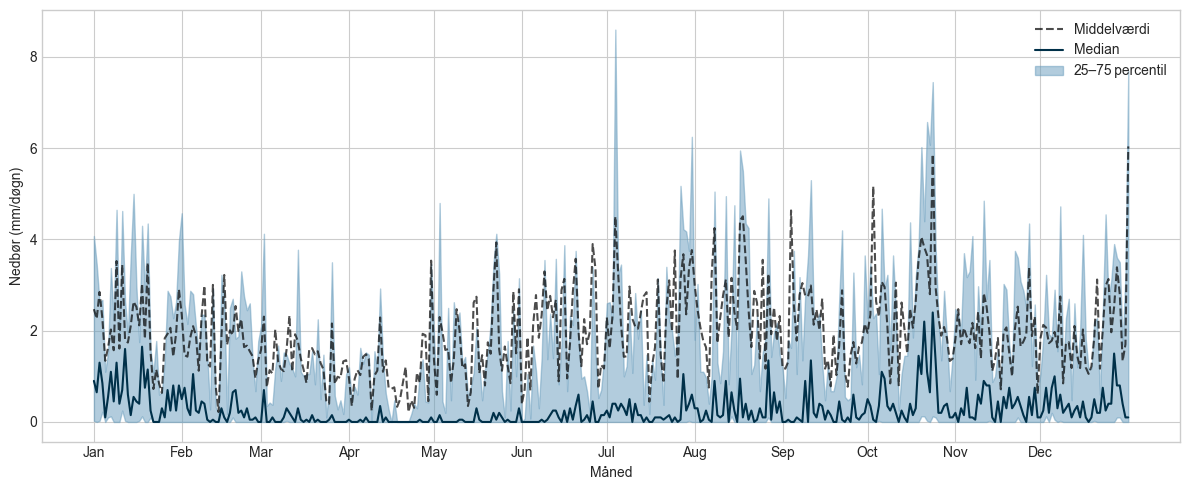

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Antag, at df er din DataFrame med et datetime-indeks og kolonnen 'precip_total_daily'
df['DayOfYear'] = df.index.dayofyear

# Grupper dataene efter 'DayOfYear' og beregn mean, median samt 25% og 75% percentil
daily_stats = df.groupby('DayOfYear')['precip_total_daily'].agg(
    mean='mean',
    median='median',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
)

# Tailwind-inspireret palette
colors = {
    "barn_red": "#780000",
    "fire_brick": "#c1121f",
    "papaya_whip": "#fdf0d5",
    "prussian_blue": "#003049",
    "air_superiority_blue": "#669bbc"
}

# Find dag-på-året for månedernes første dag (brug et ikke-skudår som reference)
month_starts = pd.date_range('2001-01-01', periods=12, freq='MS')
month_days   = month_starts.dayofyear
month_names  = month_starts.strftime('%b')  # 'Jan', 'Feb', ...

# Opret plottet
fig, ax = plt.subplots(figsize=(12, 5))

# Plot mean (stiplet)
ax.plot(
    daily_stats.index,
    daily_stats['mean'],
    color="black",
    linewidth=1.5,
    alpha=0.7,
    linestyle='--',
    label='Middelværdi'
)

# Plot median (fuld linje)
ax.plot(
    daily_stats.index,
    daily_stats['median'],
    color=colors["prussian_blue"],
    linewidth=1.5,
    label='Median'
)

# Fyld mellem 25% og 75% percentil
ax.fill_between(
    daily_stats.index,
    daily_stats['q25'],
    daily_stats['q75'],
    color=colors["air_superiority_blue"],
    alpha=0.5,
    label='25–75 percentil'
)

# Sæt labels
ax.set_ylabel("Nedbør (mm/døgn)")
ax.set_xlabel("Måned")

# Kun månedernes start som xticks
ax.set_xticks(month_days)
ax.set_xticklabels(month_names)

ax.legend()
plt.tight_layout()
plt.show()

In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates

# # Antag, at df er din DataFrame med et datetime-indeks og kolonnen 'precip_total_daily'
# # Tilføj en kolonne med "dag på året"
# df['DayOfYear'] = df.index.dayofyear

# # Grupper dataene efter 'DayOfYear' og beregn middelværdien og standardafvigelsen for 'precip_total_daily'
# daily_stats = df.groupby('DayOfYear')['precip_total_daily'].agg(['mean', 'std'])

# # Beregn et 7-dages glidende gennemsnit for gennemsnitsværdien
# daily_stats['mean_smooth'] = daily_stats['mean'].rolling(window=30, center=True).mean()

# # Brug din Tailwind-inspirerede palette
# colors = {
#     "barn_red": "#780000",               
#     "fire_brick": "#c1121f",             
#     "papaya_whip": "#fdf0d5",            
#     "prussian_blue": "#003049",          
#     "air_superiority_blue": "#669bbc"    
# }

# # Opret plottet
# fig, ax = plt.subplots(figsize=(12, 5))

# # Plot det oprindelige gennemsnit for sammenligning (valgfrit)
# ax.plot(daily_stats.index, daily_stats['mean'], color=colors["prussian_blue"], linewidth=1, linestyle='--', alpha=0.6, label='Gennemsnit (oprindeligt)')

# # Plot det glidende gennemsnit
# ax.plot(daily_stats.index, daily_stats['mean_smooth'], color=colors["prussian_blue"], linewidth=1.5, label='Glidende gennemsnit (7 dages)')

# # Visualiser standardafvigelsen med en fyldning (for det oprindelige gennemsnit)
# ax.fill_between(daily_stats.index,
#                 daily_stats['mean'] - daily_stats['std'],
#                 daily_stats['mean'] + daily_stats['std'],
#                 color=colors["air_superiority_blue"],
#                 alpha=0.5,
#                 label='Gennemsnit ± STD')

# ax.set_title("Gennemsnitlig daglig nedbør ved KarupBro", fontsize=14)
# ax.set_ylabel("Nedbør (mm)", color=colors["prussian_blue"])
# ax.set_xlabel("Dag på året")
# ax.tick_params(axis='y', labelcolor=colors["prussian_blue"])
# ax.legend()
# plt.tight_layout()
# plt.show()


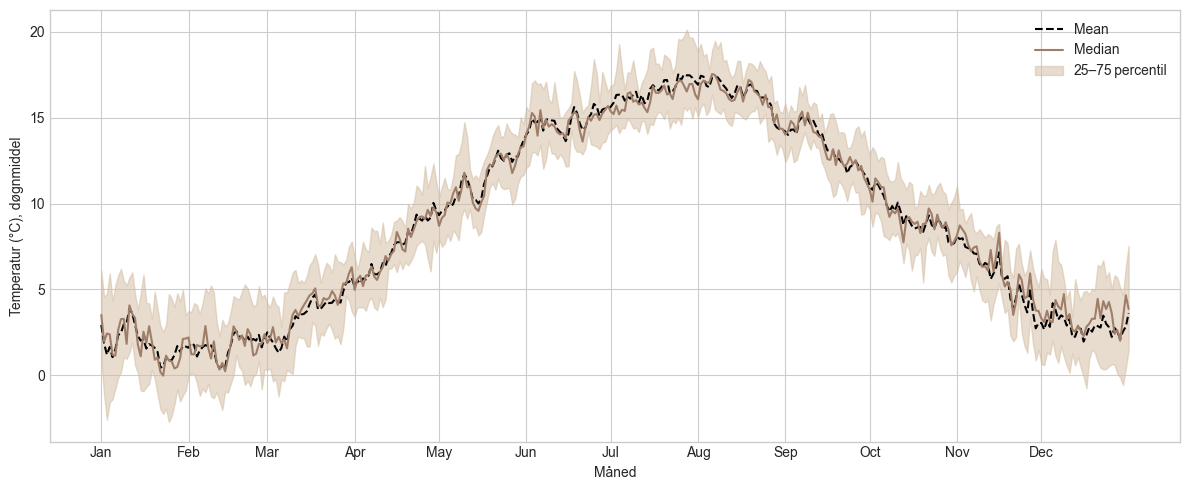

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Antag, at df er din DataFrame med et datetime-indeks og kolonnen 'temp_mean_daily'
df['DayOfYear'] = df.index.dayofyear

# Grupper dataene efter 'DayOfYear' og beregn mean, median samt 25% og 75% percentil for 'temp_mean_daily'
daily_stats = df.groupby('DayOfYear')['temp_mean_daily'].agg(
    mean='mean',
    median='median',
    q25=lambda x: x.quantile(0.25),
    q75=lambda x: x.quantile(0.75)
)

# Find dag-på-året for månedernes første dag (brug et ikke-skudår som reference)
month_starts = pd.date_range('2001-01-01', periods=12, freq='MS')
month_days   = month_starts.dayofyear
month_names  = month_starts.strftime('%b')  # 'Jan', 'Feb', ...

# Tailwind-inspirerede farver
colors = {
    "beaver": "#9F7E69",         # mørkere beige
    "dun": "#D2BBA0",            # lysere beige
}

# Opret plottet
fig, ax = plt.subplots(figsize=(12, 5))

# Plot mean (stiplet, sort)
ax.plot(
    daily_stats.index,
    daily_stats['mean'],
    color='black',
    linewidth=1.5,
    linestyle='--',
    label='Mean'
)

# Plot median (fuld linje)
ax.plot(
    daily_stats.index,
    daily_stats['median'],
    color=colors["beaver"],
    linewidth=1.5,
    label='Median'
)

# Fyld mellem 25% og 75% percentil
ax.fill_between(
    daily_stats.index,
    daily_stats['q25'],
    daily_stats['q75'],
    color=colors["dun"],
    alpha=0.5,
    label='25–75 percentil'
)

# Sæt y-label
ax.set_ylabel("Temperatur (°C), døgnmiddel")

# Vis kun månedernes start som xticks
ax.set_xticks(month_days)
ax.set_xticklabels(month_names)
ax.set_xlabel("Måned")

ax.legend()
plt.tight_layout()
plt.show()

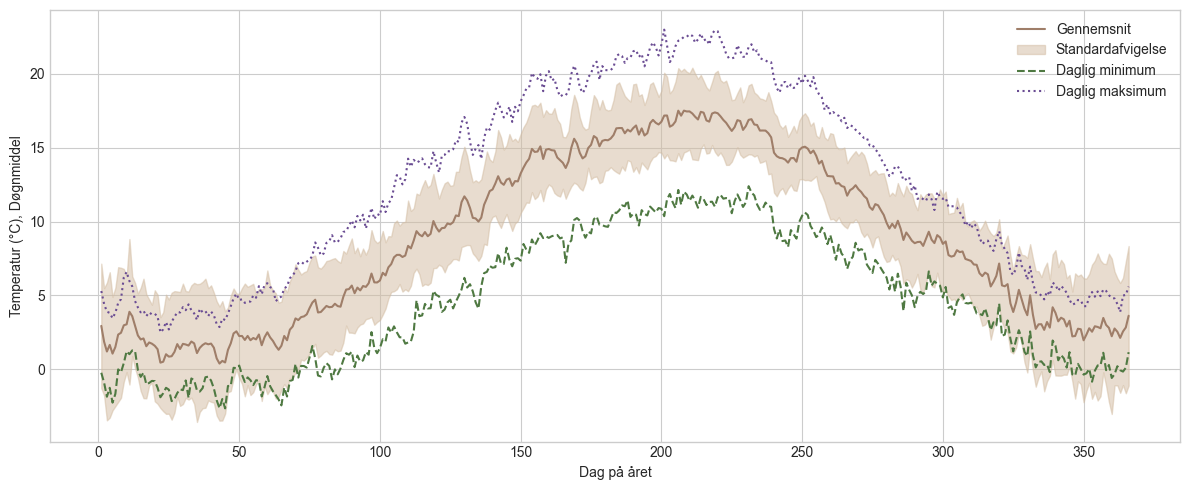

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Antag, at df er din DataFrame med et datetime-indeks og kolonnerne:
# 'temp_mean_daily', 'temp_min_daily' og 'temp_max_daily'

# Tilføj en kolonne med "dag på året"
df['DayOfYear'] = df.index.dayofyear

# Grupper dataene efter 'DayOfYear' og beregn middelværdien og standardafvigelsen for temp_mean_daily
daily_stats = df.groupby('DayOfYear')['temp_mean_daily'].agg(['mean', 'std'])

# Beregn gennemsnit for temp_min_daily og temp_max_daily for hver dag på året
daily_min = df.groupby('DayOfYear')['temp_min_daily'].mean()
daily_max = df.groupby('DayOfYear')['temp_max_daily'].mean()

# Definer din Tailwind-inspirerede palette
colors = {
    "barn_red": "#780000",
    "fire_brick": "#c1121f",
    
    # Nye beige nuancer
    "beaver": "#9F7E69",  # bruges fx til linjen for gennemsnit
    "dun": "#D2BBA0",     # bruges fx til fill (standardafvigelse)
    
    "prussian_blue": "#003049",
    "air_superiority_blue": "#669bbc",
    
    # Grøn og tilsvarende lysere nuance
    "fern_green": "#4F7942",       
    "light_fern_green": "#84A17B",  
    
    # Lilla og tilsvarende lysere nuance
    "muted_purple": "#6A4C93",       
    "light_muted_purple": "#9782B3"
}

# Opret plottet
fig, ax = plt.subplots(figsize=(12, 5))

# Plot gennemsnit og standardafvigelse for temp_mean_daily
ax.plot(daily_stats.index, daily_stats['mean'],
        color=colors["beaver"], linewidth=1.5, label='Gennemsnit')
ax.fill_between(daily_stats.index,
                daily_stats['mean'] - daily_stats['std'],
                daily_stats['mean'] + daily_stats['std'],
                color=colors["dun"],
                alpha=0.5,
                label='Standardafvigelse')

# Plot temp_min_daily og temp_max_daily
ax.plot(daily_min.index, daily_min,
        color=colors["fern_green"], linestyle='--', linewidth=1.5, label='Daglig minimum')
ax.plot(daily_max.index, daily_max,
        color=colors["muted_purple"], linestyle=':', linewidth=1.5, label='Daglig maksimum')

ax.set_ylabel("Temperatur (°C), Døgnmiddel")
ax.set_xlabel("Dag på året")
ax.tick_params(axis='y')
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_22308/3372496681.py:64: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from current font.
  plt.tight_layout()
/Users/nicolaigarderhansen/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


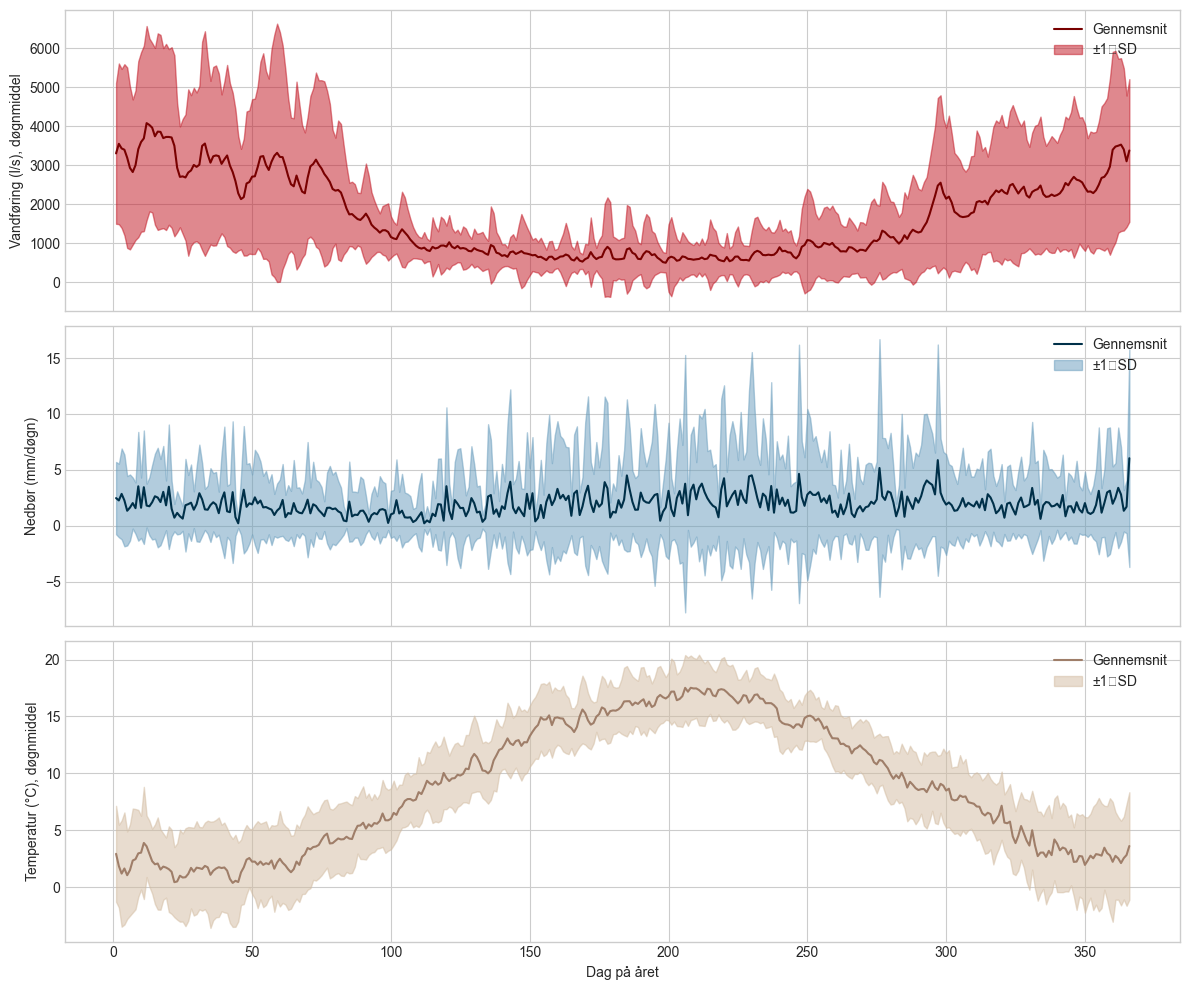

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Antag, at df allerede har et datetime-indeks
df = df.copy()                       # undgå SettingWithCopy‑advarsler
df["DayOfYear"] = df.index.dayofyear

# --------------------------------------------------
# 1. Forbered en hjælpedict med kolonnenavn og farver
# --------------------------------------------------
series_cfg = {
    "KarupBro": {
        "ylabel": "Vandføring (l/s), døgnmiddel",
        "line":  "#780000",          # barn_red
        "fill":  "#c1121f",          # fire_brick
    },
    "precip_total_daily": {
        "ylabel": "Nedbør (mm/døgn)",
        "line":  "#003049",          # prussian_blue
        "fill":  "#669bbc",          # air_superiority_blue
    },
    "temp_mean_daily": {
        "ylabel": "Temperatur (°C), døgnmiddel",
        "line":  "#9F7E69",          # beaver
        "fill":  "#D2BBA0",          # dun
    },
}

# --------------------------------------------------
# 2. Beregn dag‑for‑dag‑statistikker for hver serie
# --------------------------------------------------
stats = {}
for col in series_cfg:
    stats[col] = (
        df.groupby("DayOfYear")[col]
          .agg(["mean", "std"])
          .reset_index()
    )

# --------------------------------------------------
# 3. Plot på tre underplots med fælles x‑akse
# --------------------------------------------------
fig, axes = plt.subplots(
    nrows=3, ncols=1, figsize=(12, 10), sharex=True
)

for ax, (col, cfg) in zip(axes, series_cfg.items()):
    s = stats[col]
    ax.plot(
        s["DayOfYear"], s["mean"],
        color=cfg["line"], linewidth=1.5, label="Gennemsnit"
    )
    ax.fill_between(
        s["DayOfYear"],
        s["mean"] - s["std"],
        s["mean"] + s["std"],
        color=cfg["fill"], alpha=0.5, label="±1 SD"
    )
    ax.set_ylabel(cfg["ylabel"])
    ax.legend(loc="upper right")
    ax.tick_params(axis="y")

axes[-1].set_xlabel("Dag på året")
plt.tight_layout()
plt.show()

## Zoom på ekstreme hændelser

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_22308/2591790129.py:45: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  plt.tight_layout()
/Users/nicolaigarderhansen/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


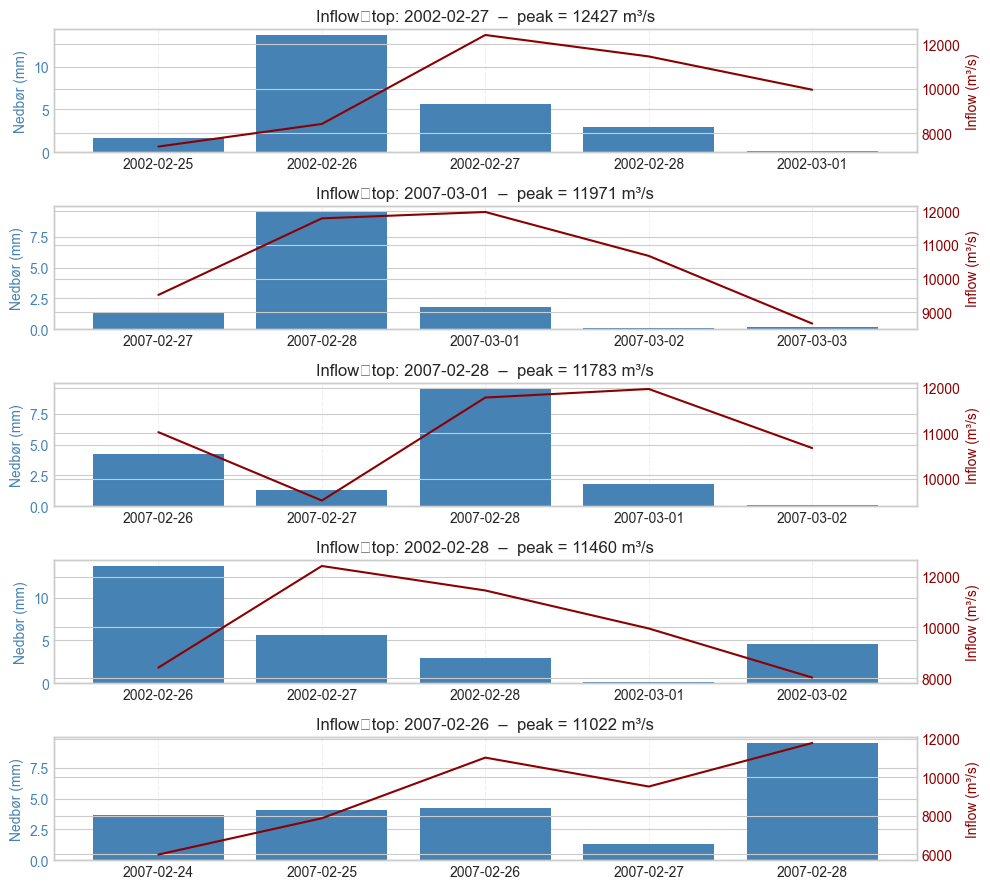

In [12]:
"""
Plotter tre zoom‑vinduer omkring de 3 største inflow‑toppe:

- Finder de tre højeste værdier i kolonnen 'KarupBro'
- For hver top vises et 5‑døgns vindue (±2 dage) med:
    • Nedbør (søjler)  – venstre akse
    • Inflow  (linje)   – højre akse
"""

import pandas as pd
import matplotlib.pyplot as plt

# Antag at df (med datetime‑index) allerede findes i hukommelsen.
# Hvis ikke, indlæs som i din tidligere kode:
# df = pd.read_csv(..., parse_dates=['time']).set_index('time')

def plot_top3_inflow_windows(data: pd.DataFrame,
                             target='KarupBro',
                             precip='precip_total_daily',
                             days_before=2,
                             days_after=2):
    """Tegn 3 zoom‑plots omkring de største inflow‑toppe."""
    # 1) find top 3 datoer (højeste inflow)
    tops = data[target].nlargest(5)
    fig, axes = plt.subplots(5, 1, figsize=(10, 9), sharex=False)

    for ax, (peak_time, peak_val) in zip(axes, tops.items()):
        win = data.loc[peak_time - pd.Timedelta(days=days_before):
                       peak_time + pd.Timedelta(days=days_after)]

        # Nedbør som søjler
        ax.bar(win.index, win[precip], color='steelblue', label='Nedbør (mm)')
        ax.set_ylabel("Nedbør (mm)", color='steelblue')
        ax.tick_params(axis='y', labelcolor='steelblue')

        # Inflow linje
        ax2 = ax.twinx()
        ax2.plot(win.index, win[target], color='darkred', label='Inflow (m³/s)')
        ax2.set_ylabel("Inflow (m³/s)", color='darkred')
        ax2.tick_params(axis='y', labelcolor='darkred')

        ax.set_title(f"Inflow‑top: {peak_time.date()}  –  peak = {peak_val:.0f} m³/s")
        ax.grid(True, axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


# Kør funktionen
plot_top3_inflow_windows(df)



/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_22308/1897376912.py:49: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  plt.tight_layout()


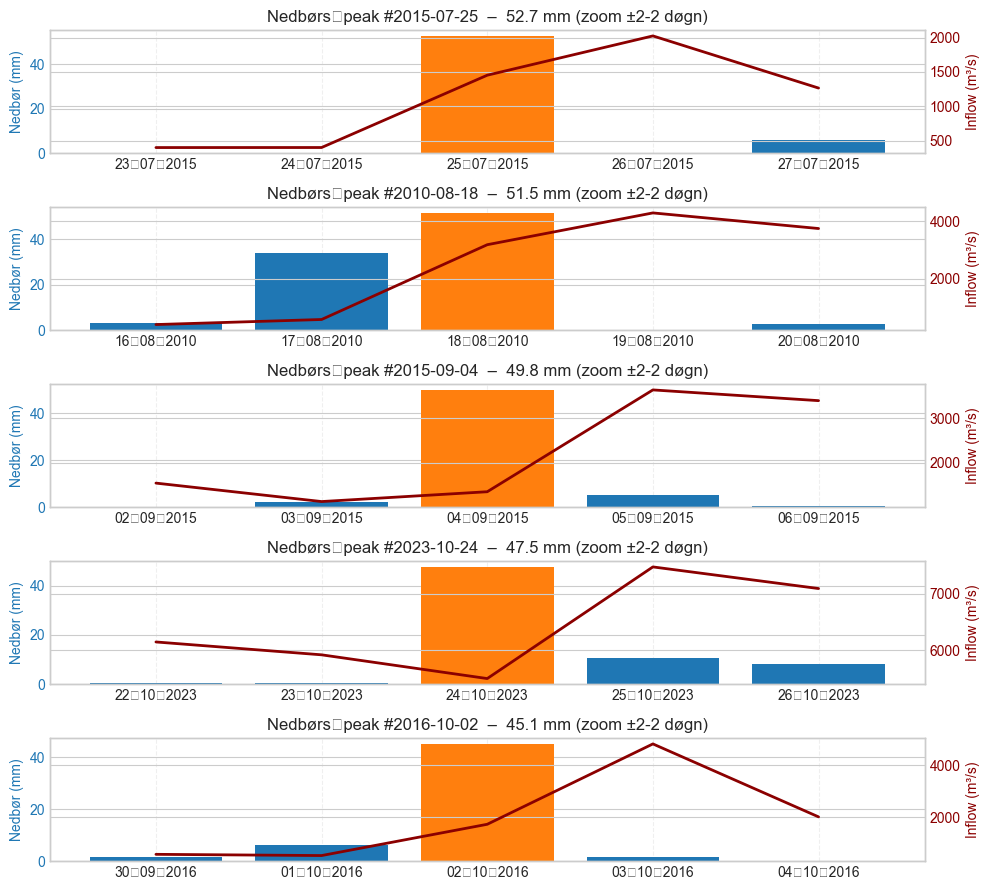

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


def plot_top3_precip_windows(df,
                             precip_col="precip_total_daily",
                             inflow_col="KarupBro",
                             days_before=2,
                             days_after=2):
    """
    Tegner tre zoom‑plots omkring de kraftigste nedbørs‑dage.
    df           : DataFrame med datetime‑index
    precip_col   : kolonnenavn for nedbør
    inflow_col   : kolonnenavn for inflow
    days_before  : antal døgn før peak, der vises
    days_after   : antal døgn efter peak, der vises
    """

    # 1) Find de tre største nedbørsdage
    top_rain = df[precip_col].dropna().nlargest(5)

    fig, axes = plt.subplots(5, 1, figsize=(10, 9), sharex=False)

    for ax, (peak_ts, peak_val) in zip(axes, top_rain.items()):
        # 2) Klip vindue omkring peak‑dato
        win = df.loc[peak_ts - pd.Timedelta(days=days_before):
                     peak_ts + pd.Timedelta(days=days_after)]

        # Nedbør (venstre akse) – marker selve peak‑dagen i en kontrastfarve
        colors = ["tab:blue" if t != peak_ts else "tab:orange" for t in win.index]
        ax.bar(win.index, win[precip_col], color=colors, width=0.8)
        ax.set_ylabel("Nedbør (mm)", color="tab:blue")
        ax.tick_params(axis='y', labelcolor="tab:blue")

        # Inflow (højre akse) – typisk reaktion på regn
        ax2 = ax.twinx()
        ax2.plot(win.index, win[inflow_col],
                 color="darkred", linewidth=2)
        ax2.set_ylabel("Inflow (m³/s)", color="darkred")
        ax2.tick_params(axis='y', labelcolor="darkred")

        # Titel + pynt
        ax.set_title(
            f"Nedbørs‑peak #{peak_ts.date()}  –  {peak_val:.1f} mm (zoom ±{days_before}-{days_after} døgn)")
        ax.xaxis.set_major_formatter(DateFormatter("%d‑%m‑%Y"))
        ax.grid(True, axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


# -----  Kør funktionen  -----
plot_top3_precip_windows(df)

## Nedbør vs Inflow

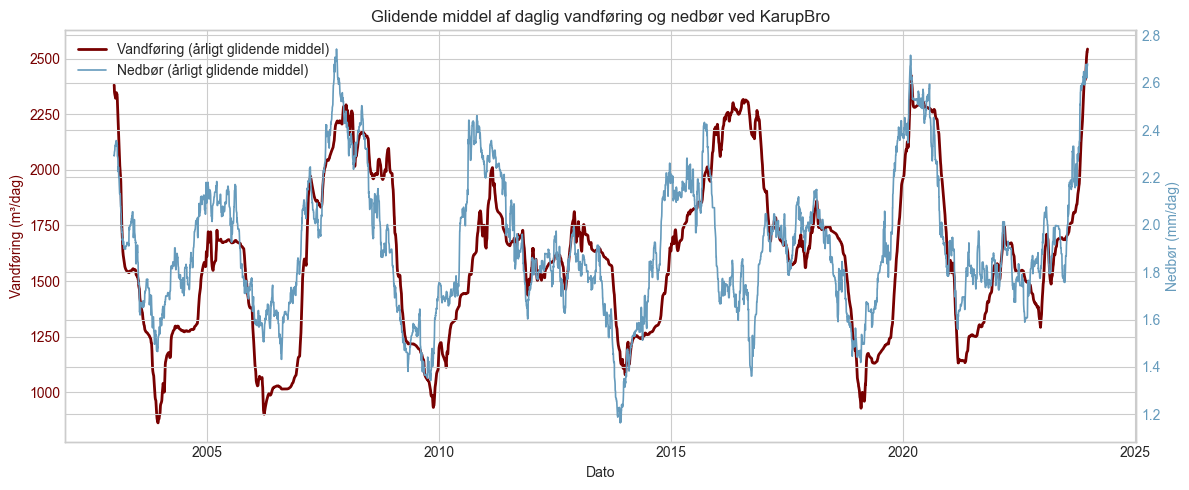

In [14]:
# Calculate 30-day rolling mean of inflow
df['KarupBro_rolling30'] = df['KarupBro'].rolling(window=365).mean()
# Calculate 30-day rolling mean of precipitation
df['precip_total_daily_rolling30'] = df['precip_total_daily'].rolling(window=365).mean()

# Tailwind-stil farver
tailwind_colors = {
    "barn_red": "#780000",               # inflow
    "prussian_blue": "#003049",
    "air_superiority_blue": "#669bbc"    # precipitation
}

# Plot inflow (rolling mean) and precipitation (original) with dual axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Rolling mean inflow
ax1.plot(df.index, df['KarupBro_rolling30'], color=tailwind_colors["barn_red"], linewidth=2, label='Vandføring (årligt glidende middel)')
ax1.set_ylabel('Vandføring (m³/dag)', color=tailwind_colors["barn_red"])
ax1.tick_params(axis='y', labelcolor=tailwind_colors["barn_red"])
ax1.set_xlabel("Dato")
ax1.set_title("Glidende middel af daglig vandføring og nedbør ved KarupBro")

# Precipitation (original values)
ax2 = ax1.twinx()
ax2.plot(df.index, df['precip_total_daily_rolling30'], color=tailwind_colors["air_superiority_blue"], linewidth=1.2, label='Nedbør (årligt glidende middel)')
ax2.set_ylabel('Nedbør (mm/dag)', color=tailwind_colors["air_superiority_blue"])
ax2.tick_params(axis='y', labelcolor=tailwind_colors["air_superiority_blue"])

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Combined legend
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_22308/3942462033.py:81: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  plt.tight_layout()
/Users/nicolaigarderhansen/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


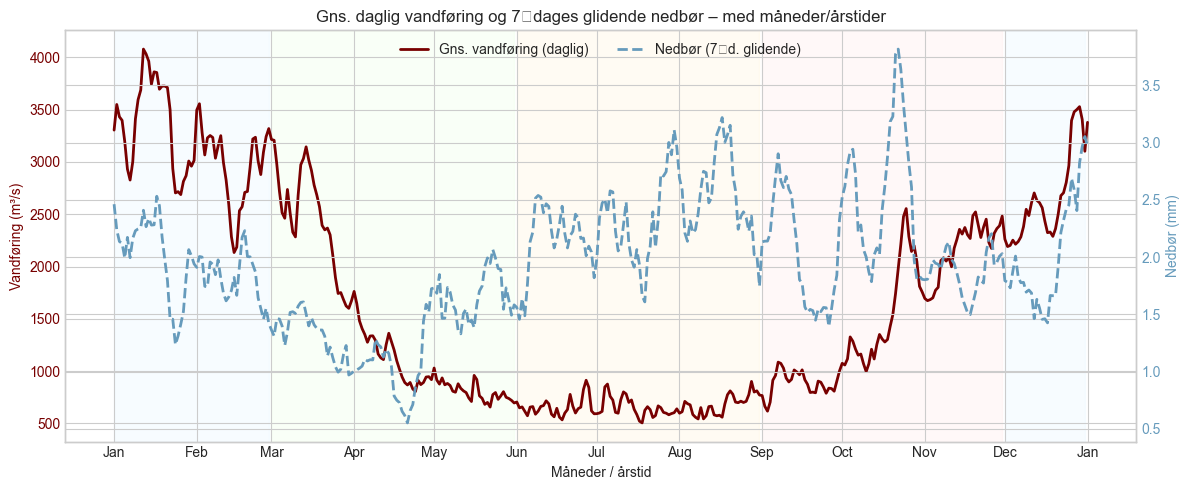

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# ---------- forudsætninger ----------
# df med datetime‑index – og kolonner 'KarupBro', 'precip_total_daily'
df['day_of_year'] = df.index.dayofyear             # 1…365(‑366)

mean_by_day = (
    df.groupby('day_of_year')[['KarupBro','precip_total_daily']]
      .mean()
)
mean_by_day['precip_7d'] = (
    mean_by_day['precip_total_daily']
      .rolling(window=7, center=True, min_periods=1)
      .mean()
)

# # Make karupbro moving average
# mean_by_day['KarupBro'] = (
#     mean_by_day['KarupBro']
#     .rolling(window=7, center=True, min_periods=1)
#     .mean()
# )

# Lav en “fiktiv” dato‑akse (alle år = 2001) ‑ praktisk til dateticks
base_year = 2001                                 # et ikke‑skudår
dates = pd.to_datetime(base_year*1000 + mean_by_day.index, format='%Y%j')

# ---------- plot ----------
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(dates, mean_by_day['KarupBro'],
         lw=2, color='#780000', label='Gns. vandføring (daglig)')
ax1.set_ylabel('Vandføring (m³/s)', color='#780000')
ax1.tick_params(axis='y', labelcolor='#780000')

ax2 = ax1.twinx()
ax2.plot(dates, mean_by_day['precip_7d'],
         ls='--', lw=2, color='#669bbc', label='Nedbør (7‑d. glidende)')
ax2.set_ylabel('Nedbør (mm)', color='#669bbc')
ax2.tick_params(axis='y', labelcolor='#669bbc')

# -----------------------------------------------------------------
# A) Måned‑tics
# -----------------------------------------------------------------
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Jan, Feb, …

# -----------------------------------------------------------------
# B) Årstidsbånd  (kommentér ud hvis du kun vil have månedstics)
# -----------------------------------------------------------------
season_limits = {
    'Vinter':  (1,   59),   # d 1–59  (jan‑feb)
    'Forår':   (60, 151),   # d 60–151 (mar‑maj)
    'Sommer':  (152,243),   # juni‑aug
    'Efterår': (244,334),   # sep‑nov
    'Vinter2': (335,365)    # dec  (samme farve som vinter)
}
season_colors = {
    'Vinter':'#e0f7ff',
    'Vinter2':'#e0f7ff',
    'Forår':'#e8ffe0',
    'Sommer':'#fff3d1',
    'Efterår':'#ffe6e6',
}
for s,(d0,d1) in season_limits.items():
    ax1.axvspan(pd.Timestamp(base_year,1,1)+pd.Timedelta(days=d0-1),
                pd.Timestamp(base_year,1,1)+pd.Timedelta(days=d1-1),
                color=season_colors[s], alpha=0.25, zorder=0)

ax1.set_title('Gns. daglig vandføring og 7‑dages glidende nedbør – med måneder/årstider')
ax1.set_xlabel('Måneder / årstid')

# samlet signatur
lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', ncol=2)

plt.tight_layout()
plt.show()

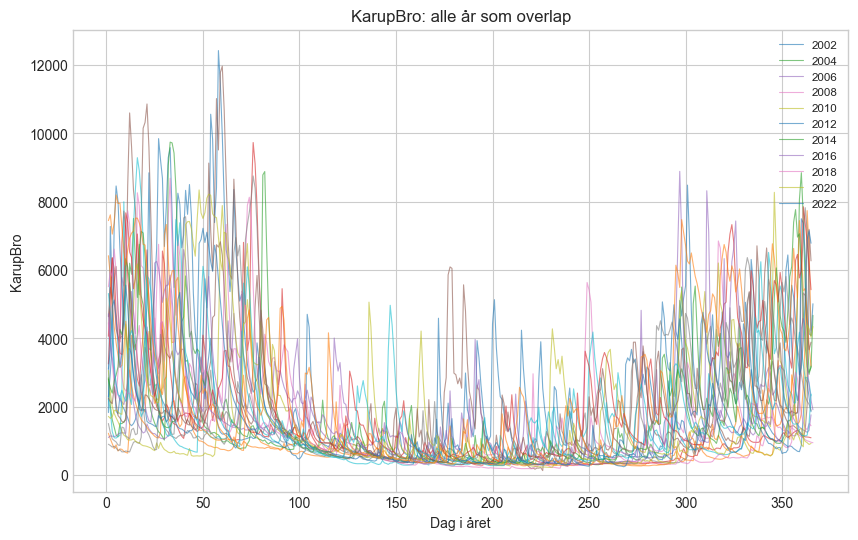

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_22308/595388495.py:42: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  plt.tight_layout(); plt.show()
/Users/nicolaigarderhansen/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


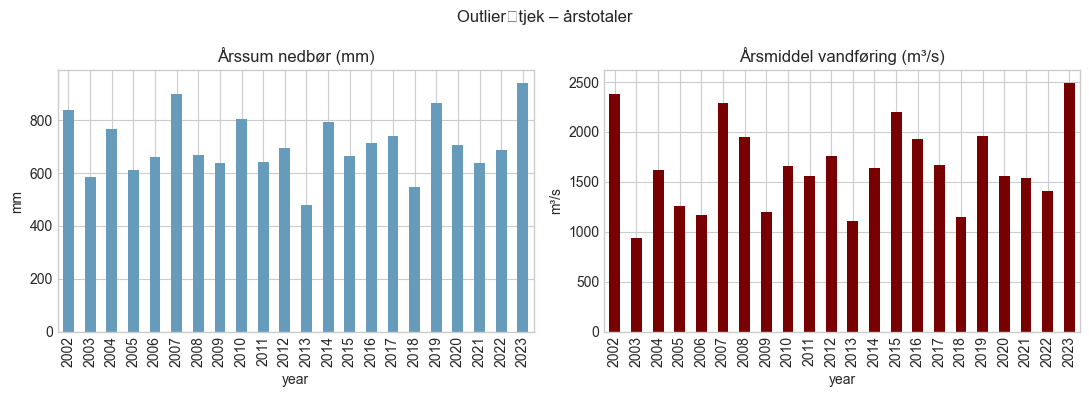

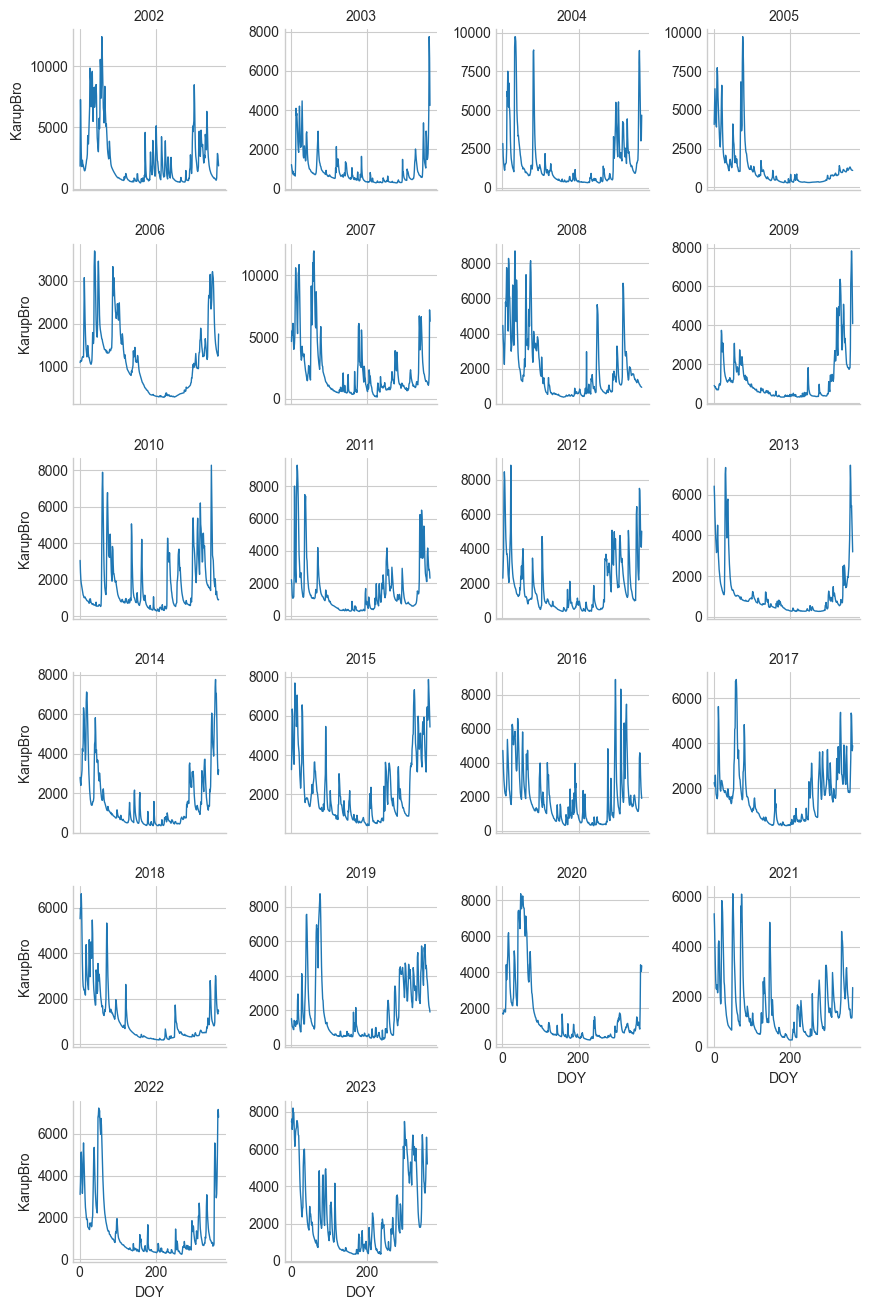

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -- lille hjælpe‑kolonne --
df['year'] = df.index.year
df['doy']  = df.index.dayofyear        # 1 … 365(366)

# =================================================================
# A) Spaghetti‑plot: hver årgang over DOY
# =================================================================
def spaghetti(var='KarupBro'):
    plt.figure(figsize=(10,6))
    for yr, grp in df.groupby('year'):
        plt.plot(grp['doy'], grp[var], lw=0.8, alpha=0.6, label=yr)
    plt.xlabel('Dag i året');  plt.ylabel(var)
    plt.title(f"{var}: alle år som overlap")
    # kun én legend‑linje per 5. år så den ikke fylder
    handles, labels = plt.gca().get_legend_handles_labels()
    step = max(1, int(len(labels)/10))
    plt.legend(handles[::step], labels[::step], loc='upper right', fontsize='small')
    plt.show()

spaghetti('KarupBro')          # prøv evt. 'precip_total_daily'

# =================================================================
# B) Totaler / middel pr. år  (søjlediagram)
# =================================================================
annual = (df
          .groupby('year')
          .agg(total_precip = ('precip_total_daily', 'sum'),
               mean_inflow  = ('KarupBro', 'mean')))

fig, ax = plt.subplots(1,2, figsize=(11,4), sharex=True)
annual['total_precip'].plot(kind='bar', color='#669bbc', ax=ax[0])
ax[0].set_title('Årssum nedbør (mm)'); ax[0].set_ylabel('mm')

annual['mean_inflow'].plot(kind='bar', color='#780000', ax=ax[1])
ax[1].set_title('Årsmiddel vandføring (m³/s)'); ax[1].set_ylabel('m³/s')

plt.suptitle('Outlier‑tjek – årstotaler')
plt.tight_layout(); plt.show()

# =================================================================
# C) Facet‑grid: ét subplot pr. år  (her vandføring vs. DOY)
# =================================================================
def facet_year(var='KarupBro', ncols=4):
    g = sns.FacetGrid(df, col='year', col_wrap=ncols, height=2.2, sharey=False)
    g.map_dataframe(sns.lineplot, x='doy', y=var, lw=1)
    g.set_titles('{col_name}')
    g.set_axis_labels('DOY', var)
    plt.tight_layout(); plt.show()

facet_year('KarupBro')         # eller facet_year('precip_total_daily')

/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_22308/2452926524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='KarupBro', data=df, palette=['#780000']*12)


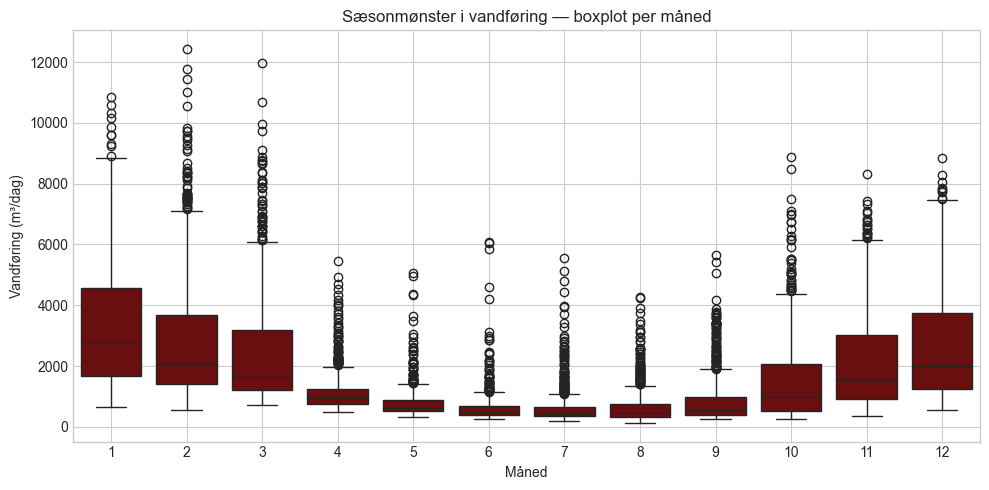

In [17]:
# Extract month for grouping
df['month'] = df.index.month

# Boxplot over vandføring per måned
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='KarupBro', data=df, palette=['#780000']*12)
plt.title('Sæsonmønster i vandføring — boxplot per måned')
plt.xlabel('Måned')
plt.ylabel('Vandføring (m³/dag)')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/rg/5qwcvj1934v3254xfppzsxm80000gn/T/ipykernel_22308/2474907420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='precip_total_daily', data=df, palette=['#669bbc']*12)


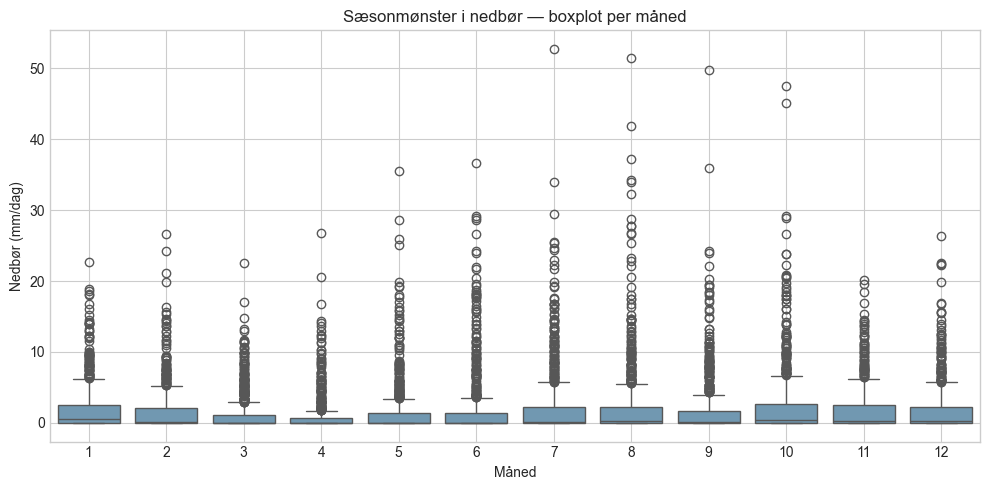

In [18]:
# Extract month for grouping
df['month'] = df.index.month

# Boxplot over vandføring per måned
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='precip_total_daily', data=df, palette=['#669bbc']*12)
plt.title('Sæsonmønster i nedbør — boxplot per måned')
plt.xlabel('Måned')
plt.ylabel('Nedbør (mm/dag)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Udvælg et sæt relevante variable til pairplot
selected_vars = [
    'KarupBro',
    'precip_total_daily',
    'temp_mean_daily',
    'temp_grass_mean_daily',
    'temp_soil_mean_daily',
    'humidity_daily',
    'radiation_global_daily',
    'sunshine_duration_daily',
    'KarupBro_lag1',
]

# Drop NA values for clean plotting
pairplot_df = df[selected_vars].dropna()

# Plot pairplot
sns.pairplot(pairplot_df, corner=True, plot_kws={'alpha': 0.3}, diag_kws={'color': '#780000'})
plt.suptitle("Pairplot af inflow og laggede værdier af nedbør og vandføring", y=1.02)
plt.show()


KeyError: "['KarupBro_lag1'] not in index"

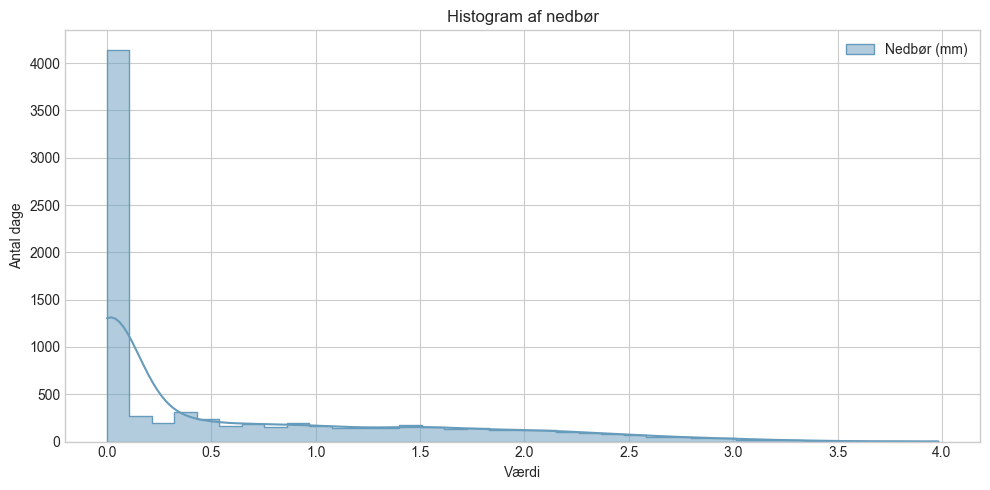

In [ ]:
# Plot histogrammer af både nedbør og vandføring
df['log_inflow'] = np.log1p(df['KarupBro'])      # log(1 + x) for at undgå log(0)
df['log_precip'] = np.log1p(df['precip_total_daily'])


plt.figure(figsize=(10, 5))

sns.histplot(df['log_precip'], color='#669bbc', kde=True, label='Nedbør (mm)', element='step', fill=True, alpha=0.5)

plt.title("Histogram af nedbør")
plt.xlabel("Værdi")
plt.ylabel("Antal dage")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

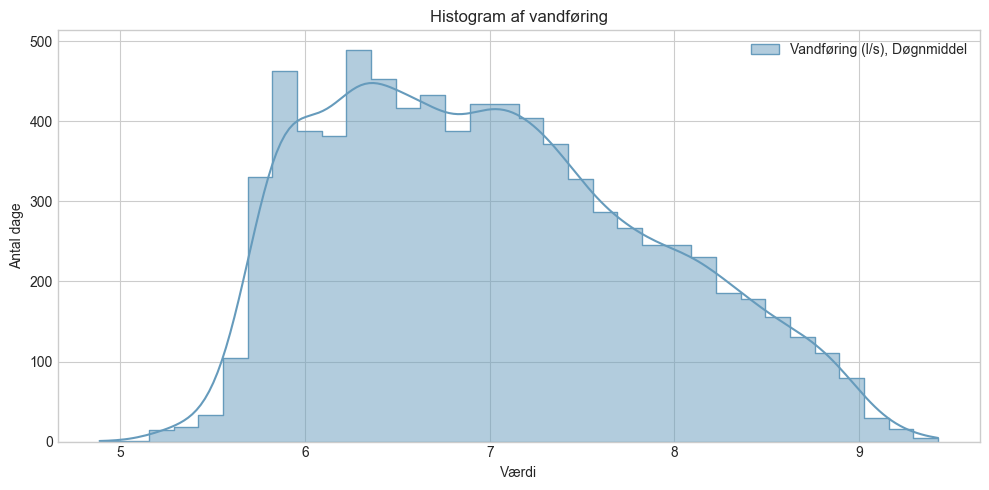

In [ ]:

# Plot histogrammer af både nedbør og vandføring
plt.figure(figsize=(10, 5))

sns.histplot(df['log_inflow'], color='#669bbc', kde=True, label='Vandføring (l/s), Døgnmiddel', element='step', fill=True, alpha=0.5)

plt.title("Histogram af vandføring")
plt.xlabel("Værdi")
plt.ylabel("Antal dage")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


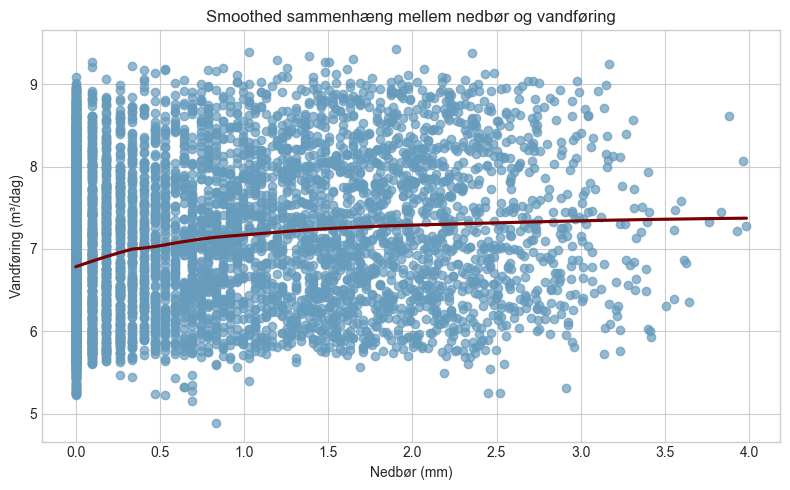

In [ ]:
import seaborn as sns

# Create smoothed scatterplot (regression with kernel smoothing)
plt.figure(figsize=(8, 5))
sns.regplot(
    x='log_precip',
    y='log_inflow',
    data=df,
    scatter_kws={'alpha': 0.7, 'color': '#669bbc'},
    line_kws={'color': '#780000'},
    lowess=True
)
plt.title("Smoothed sammenhæng mellem nedbør og vandføring")
plt.xlabel("Nedbør (mm)")
plt.ylabel("Vandføring (m³/dag)")
plt.grid(True)
plt.tight_layout()
plt.show()